### 集成算法概述
集成学习(ensemble learning)是时下非常流行的机器学习算法，它本身不是一个单独的机器学习算法，而是通 过在数据上构建多个模型，集成所有模型的建模结果。基本上所有的机器学习领域都可以看到集成学习的身影，在现实中集成学习也有相当大的作用，它可以用来做市场营销模拟的建模，统计客户来源，保留和流失，也可用来预 测疾病的风险和病患者的易感性。在现在的各种算法竞赛中，随机森林，梯度提升树(GBDT)，Xgboost等集成算法的身影也随处可见，可见其效果之好，应用之广。
#### 集成算法的目标
集成算法会考虑多个评估器的建模结果，汇总之后得到一个综合的结果，以此来获取比单个模型更好的回归或分类表现。  

多个模型集成成为的模型叫做集成评估器(ensemble estimator)，组成集成评估器的每个模型都叫做基评估器 (base estimator)。通常来说，有两类集成算法:装袋法(Bagging)，提升法(Boosting)  

袋装法的核心思想是构建多个相互独立的评估器，然后对其预测进行平均或多数表决原则来决定集成评估器的结果。装袋法的代表模型就是随机森林。

提升法中，基评估器是相关的，是按顺序一一构建的。其核心思想是结合弱评估器的力量一次次对难以评估的样本 进行预测，从而构成一个强评估器。提升法的代表模型有Adaboost和梯度提升树。

 | 袋装法 | 提升法
:-:|:-:|:-:
评估器 | 相互独立，同时运行 | 相互关联，按顺序依次构建，后建的模型会在先建模型预测失败样本上有更多的权重
抽样数集 | 有放回抽样 | 有放回抽样，但会确认数据的权重，每次抽样都会给容易预测失败的样本更多权重
决定集成的结果 | 平均或少数服从多数原则 | 加权平均，在训练集上表现更好的模型会有更大的权重
目标 | 降低方差，提高模型整体的稳定性 | 降低偏差，提高模型整体的精确度
单个评估器存在过拟合问题的时候 | 能够一定程度上解决过拟合问题 | 很可能会加剧过拟合问题
单个评估器的效力比较弱的时候 | 不是非常有帮助 | 很可能会提升模型表现
代表算法 | 随机森林 | 梯度提升树，Adaboost


#### sklearn中的集成算法 sklearn中的集成算法模块ensemble
类 | 类的功能 
:-:|:-:
ensemble.AdaBoostClassifier | AdaBoost分类 
ensemble.AdaBoostRegressor | Adaboost回归
ensemble.BaggingClassifier | 装袋分类器
ensemble.BaggingRegressor | 装袋回归器
ensemble.GradientBoostingClassifier | 梯度提升分类
ensemble.GradientBoostingRegressor | 梯度提升回归
** ensemble.RandomForestClassifier **| 随机森林分类
** ensemble.RandomForestRegressor **| 随机森林回归

### RandomForestClassifier
class sklearn.ensemble.RandomForestClassifier (n_estimators=’10’, criterion=’gini’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)

随机森林是非常具有代表性的Bagging集成算法，它的所有基评估器都是决策树，分类树组成的森林就叫做随机森 林分类器，回归树所集成的森林就叫做随机森林回归器。
### 重要参数
-  控制基评估器的参数
    - criterion
    - max_depth
    - min_samples_leaf
    - min_samples_split
    - max_features
    - min_impurity_decrease
- 控制随机森林的参数
    - n_estimators  
    这是森林中树木的数量，即基评估器的数量。这个参数对随机森林模型的精确性影响是单调的，n_estimators越 大，模型的效果往往越好。但是相应的，任何模型都有决策边界，n_estimators达到一定的程度之后，随机森林的 精确性往往不在上升或开始波动，并且，n_estimators越大，需要的计算量和内存也越大，训练的时间也会越来越 长。对于这个参数，我们是渴望在训练难度和模型效果之间取得平衡。


In [1]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [4]:
wine = load_wine()
wine.data

array([[  1.42300000e+01,   1.71000000e+00,   2.43000000e+00, ...,
          1.04000000e+00,   3.92000000e+00,   1.06500000e+03],
       [  1.32000000e+01,   1.78000000e+00,   2.14000000e+00, ...,
          1.05000000e+00,   3.40000000e+00,   1.05000000e+03],
       [  1.31600000e+01,   2.36000000e+00,   2.67000000e+00, ...,
          1.03000000e+00,   3.17000000e+00,   1.18500000e+03],
       ..., 
       [  1.32700000e+01,   4.28000000e+00,   2.26000000e+00, ...,
          5.90000000e-01,   1.56000000e+00,   8.35000000e+02],
       [  1.31700000e+01,   2.59000000e+00,   2.37000000e+00, ...,
          6.00000000e-01,   1.62000000e+00,   8.40000000e+02],
       [  1.41300000e+01,   4.10000000e+00,   2.74000000e+00, ...,
          6.10000000e-01,   1.60000000e+00,   5.60000000e+02]])

In [5]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)
print("决策树{}".format(score_c),"随机森林{}".format(score_r))

决策树0.9259259259259259 随机森林0.9444444444444444


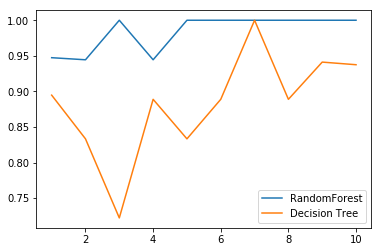

In [9]:
#画出随机森林和决策树在一组交叉验证下的效果对比
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)
clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)
plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()

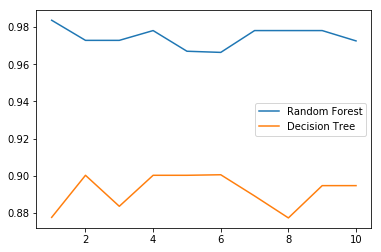

In [10]:
#画出随机森林和决策树在十组交叉验证下的效果对比
rfc_l = []
clf_l = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()

0.988888888889 23


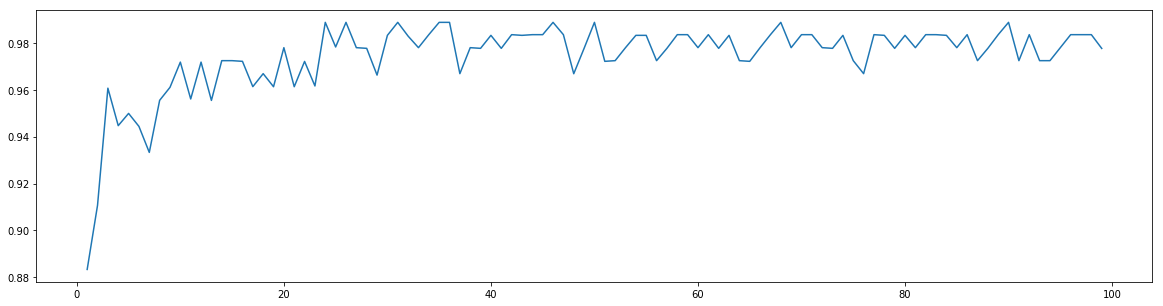

In [11]:
#n_estimators的学习曲线
scores = []
for i in range(1,100,1):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    scores.append(rfc_s)
print(max(scores),scores.index(max(scores)))
plt.figure(figsize=[20,5])
plt.plot(range(1,100,1),scores)
plt.show()

In [ ]:
myForest = RandomForestClassifier(n_estimators=23)
myForest.fit(Xtrain,Ytrain)
myForest.socre(Xtest,Ytest)


### random_state
随机森林的本质是一种装袋集成算法(bagging)，装袋集成算法是对基评估器的预测结果进行平均或用多数表决 原则来决定集成评估器的结果。在刚才的红酒例子中，我们建立了25棵树，对任何一个样本而言，平均或多数表决 原则下，当且仅当有13棵以上的树判断错误的时候，随机森林才会判断错误。单独一棵决策树对红酒数据集的分类 准确率在0.85上下浮动，假设一棵树判断错误的可能性为0.2(ε)，那20棵树以上都判断错误的可能性是：
$$e_{random_forest}=\Sigma_{i=13}^{25}C_{25}^iε^i(1-ε)^{25-i}$$
其中，i是判断错误的次数，也是判错的树的数量，ε是一棵树判断错误的概率，(1-ε)是判断正确的概率，共判对 25-i次。采用组合，是因为25棵树中，有任意i棵都判断错误

In [12]:
#按照单棵树判对概率为0.8进行计算
import numpy as np
from scipy.special import comb
np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()

0.00036904803455582827

可见，判断错误的几率非常小，这让随机森林在红酒数据集上的表现远远好于单棵决策树。  
那现在就有一个问题了:我们说袋装法服从多数表决原则或对基分类器结果求平均，这即是说，我们默认森林中的 每棵树应该是不同的，并且会返回不同的结果。设想一下，如果随机森林里所有的树的判断结果都一致(全判断对 或全判断错)，那随机森林无论应用何种集成原则来求结果，都应该无法比单棵决策树取得更好的效果才对。但我们使用了一样的决策树参数，一样的训练集和测试集，为什么随机森林里的众多树会有不同的判断结果？

In [31]:
rfc = RandomForestClassifier(n_estimators=20,random_state=0)
rfc = rfc.fit(Xtrain, Ytrain)
#随机森林的重要属性之一:estimators，查看森林中树的状况 rfc.estimators_[0].random_state
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

209652396
398764591
924231285
1478610112
441365315
1537364731
192771779
1491434855
1819583497
530702035
626610453
1650906866
1879422756
1277901399
1682652230
243580376
1991416408
1171049868
1646868794
2051556033


当random_state固定时，随机森林中生成是一组固定的树，但每棵树依然是不一致的，这是 用”随机挑选特征进行分枝“的方法得到的随机性。并且我们可以证明，当这种随机性越大的时候，袋装法的效果一般会越来越好。用袋装法集成时，基分类器应当是相互独立的，是不相同的。
但这种做法的局限性是很强的，当我们需要成千上万棵树的时候，数据不一定能够提供成千上万的特征来让我们构 筑尽量多尽量不同的树。因此，除了random_state。我们还需要其他的随机性。

### bootstrap & oob_score

要让基分类器尽量都不一样，一种很容易理解的方法是使用不同的训练集来进行训练，而袋装法正是通过有放回的 随机抽样技术来形成不同的训练数据，bootstrap就是用来控制抽样技术的参数。

在一个含有n个样本的原始训练集中，我们进行随机采样，每次采样一个样本，并在抽取下一个样本之前将该样本 放回原始训练集，也就是说下次采样时这个样本依然可能被采集到，这样采集n次，最终得到一个和原始训练集一 样大的，n个样本组成的自助集。由于是随机采样，这样每次的自助集和原始数据集不同，和其他的采样集也是不 同的。这样我们就可以自由创造取之不尽用之不竭，并且互不相同的自助集，用这些自助集来训练我们的基分类 器，我们的基分类器自然也就各不相同了。

然而有放回抽样也会有自己的问题。由于是有放回，一些样本可能在同一个自助集中出现多次，而其他一些却可能 被忽略，一般来说，自助集大约平均会包含63%的原始数据。因为每一个样本被抽到某个自助集中的概率为:
$$ 1-(1-\frac{1}{n})^n$$
当n足够大的时候，概率收敛于0.632，因此会有约37%的训练数据被浪费掉，没有参与训练。这部分数据被称为袋外数据（out of bag data)。这部分数据可以用来做袋外评分，即是oob_score。但是如果基评估器数量不够大，很可能就没有数据掉落在袋外，自然也就无法使用oob数据来测试模型了。

In [32]:
 #无需划分训练集和测试集
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(wine.data,wine.target)
#重要属性oob_score_ 
rfc.oob_score_
 

0.9831460674157303

### bagging的必要条件
袋装法除了基评估器必须独立外，还有另一个必要条件:基分类器的判断准确率至少要超过随机分类器，即时说，基分类器的判断准确率至少要超过50%。否则bagging算法无效。

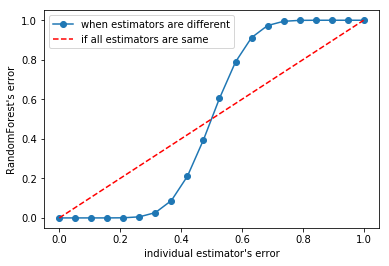

In [17]:
import numpy as np
x = np.linspace(0,1,20)
y = []
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i))
                  for i in range(13,26)]).sum()
    y.append(E)
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()

可以从图像上看出，当基分类器的误差率小于0.5，即准确率大于0.5时，集成的效果是比基分类器要好的。相反， 当基分类器的误差率大于0.5，袋装的集成算法就失效了。所以在使用随机森林之前，一定要检查，用来组成随机 森林的分类树们是否都有至少50%的预测正确率。

### RandomForestRegressor
class sklearn.ensemble.RandomForestRegressor (n_estimators=’warn’, criterion=’mse’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)

所有的参数，属性与接口，全部和随机森林分类器一致。仅有的不同就是回归树与分类树的不同，不纯度的指标，参数Criterion不一致。
#### criterion
回归树衡量分枝质量的指标，支持的标准有三种:
- 输入"mse"使用均方误差mean squared error(MSE)，父节点和叶子节点之间的均方误差的差额将被用来作为特征选择的标准，这种方法通过使用叶子节点的均值来最小化L2损失 
- 输入“friedman_mse”使用费尔德曼均方误差，这种指标使用弗里德曼针对潜在分枝中的问题改进后的均方误差 
- 输入"mae"使用绝对平均误差MAE(mean absolute error)，这种指标使用叶节点的中值来最小化L1损失

$$MSE=\frac{1}{N}\Sigma_i^N(f_i-y_i)^2$$

### score
回归树的socre方法返回的是R平方，不是MSE，一定要注意

In [19]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
boston = load_boston()
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
cross_val_score(regressor, boston.data, boston.target, cv=10, scoring = "neg_mean_squared_error")

array([-10.60400153,  -5.34859049,  -5.00482902, -21.30948927,
       -12.21354202, -18.50599124,  -6.89427068, -93.92849386,
       -29.91458572, -15.1764633 ])

### 继续调参

In [34]:
import pandas as pd
df = pd.read_csv('../data/HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [35]:
#预处理数据
def preprocessing(df):
    data = df.dropna()
    data["salary"] = [map_salary(s) for s in data["salary"].values]
    data = data.drop(["department"],axis=1)
    return data
def map_salary(salary):
    d = dict([("low",1),("medium",2),("high",3)])
    return d.get(salary,0)

data = preprocessing(df)
from sklearn.model_selection import train_test_split
Y = data['left']
X = data.drop(['left'],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

print(X_train.shape)
print(X_test.shape)

(10498, 8)
(4500, 8)


/Users/roy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [36]:
#先进行一次简单的建模
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
score_pre = cross_val_score(rfc,X,Y,cv=10).mean()
score_pre

0.99266666666666659

0.993 121


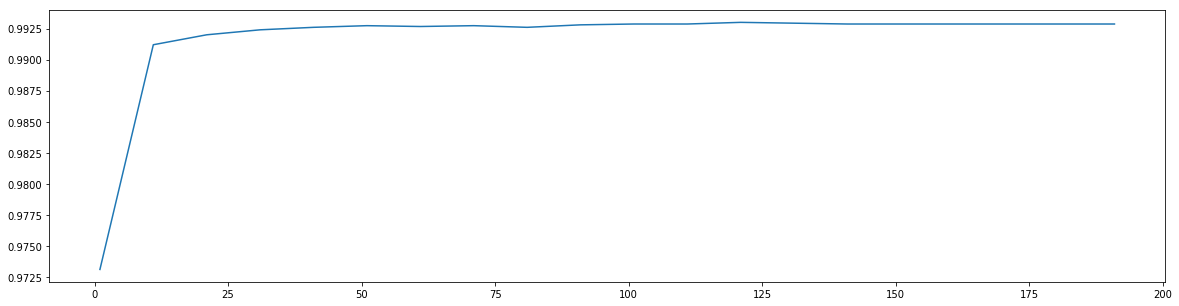

In [37]:
#计算最佳n_estimators
scores = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1, n_jobs=-1,random_state=90 )
    score = cross_val_score(rfc,X,Y,cv=10).mean()
    scores.append(score)
print(max(scores),scores.index(max(scores))*10+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scores)
plt.show()

0.993 117


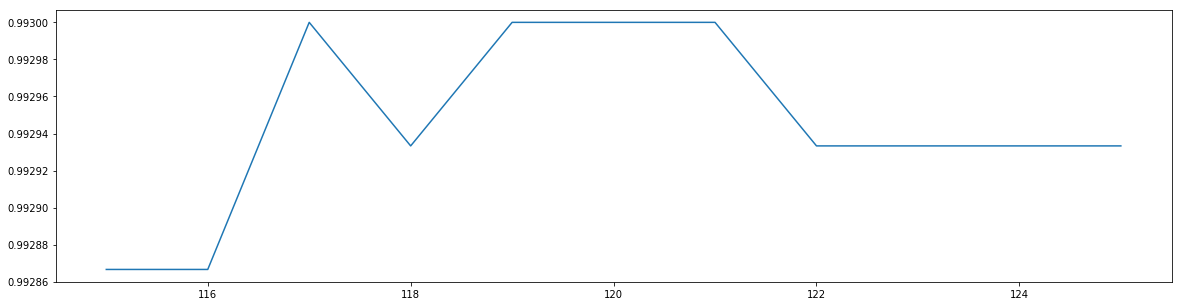

In [38]:
scores=[]
for i in range(115,126):
    rfc = RandomForestClassifier(n_estimators=i, n_jobs=-1,random_state=90)
    score = cross_val_score(rfc,X,Y,cv=10).mean()
    scores.append(score)
print(max(scores),115+scores.index(max(scores)))
plt.figure(figsize=[20,5])
plt.plot(range(115,126),scores)
plt.show()

In [40]:
#使用网格搜索确定其他参数
import numpy as np
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(1,20,1)}
rfc = RandomForestClassifier(n_estimators=117,random_state=90)
gs = GridSearchCV(rfc,param_grid,cv=10)
gs.fit(X,Y)
print(gs.best_score_)
gs.best_params_


0.992599013202


{'max_depth': 19}

<img src='./07.png' width=400/>
将max_depth设置为有限之后，模型的准确率下降了。限制max_depth，是让模型变得简单，把模型向左推，而模型整体的准确率下降了，即整体的泛化误差上升了，这说明模型现在位于图像左边，即泛化误差最低点的左边(偏差为主导的一边)。通常来说，随机森林应该在泛化误差最低点的右边，树模型应该倾向 于过拟合，而不是拟合不足。这和数据集本身有关，但也有可能是调整的n_estimators对于数据集来说太大， 因此将模型拉到泛化误差最低点去了。然而，既然追求最低泛化误差，那我们就保留这个n_estimators，除非有其他的因素，可以达到更高的准确率。

当模型位于图像左边时，需要的是增加模型复杂度(增加方差，减少偏差)的选项，因此max_depth应该尽量大，min_samples_leaf和min_samples_split都应该尽量小。这几乎是在说明，除了max_features，我们没有任何 参数可以调整了，因为max_depth，min_samples_leaf和min_samples_split是剪枝参数，是减小复杂度的参数。 在这里，可以预言，我们已经非常接近模型的上限，模型很可能没有进一步提高的空间了